## General Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Import dataset and perform exploratory analysis

Loading the iris dataset and split it into 30% test data and 70% training data

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()


In [8]:
df = pd.DataFrame(iris.data[:])
df['class'] = iris.target[:]
df = df.rename(columns={0:'sepal_length',1:'sepal_width',2:'petal_length',3:'petal_width'})

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#viewing data array
#iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

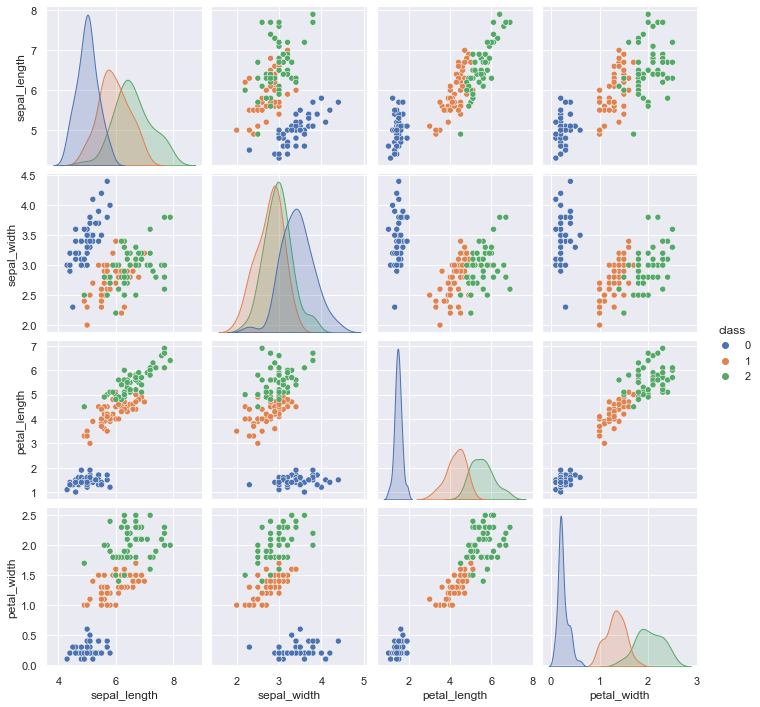

In [14]:
sns.set_theme(style='darkgrid')
sns.pairplot(df, hue='class', palette='deep')

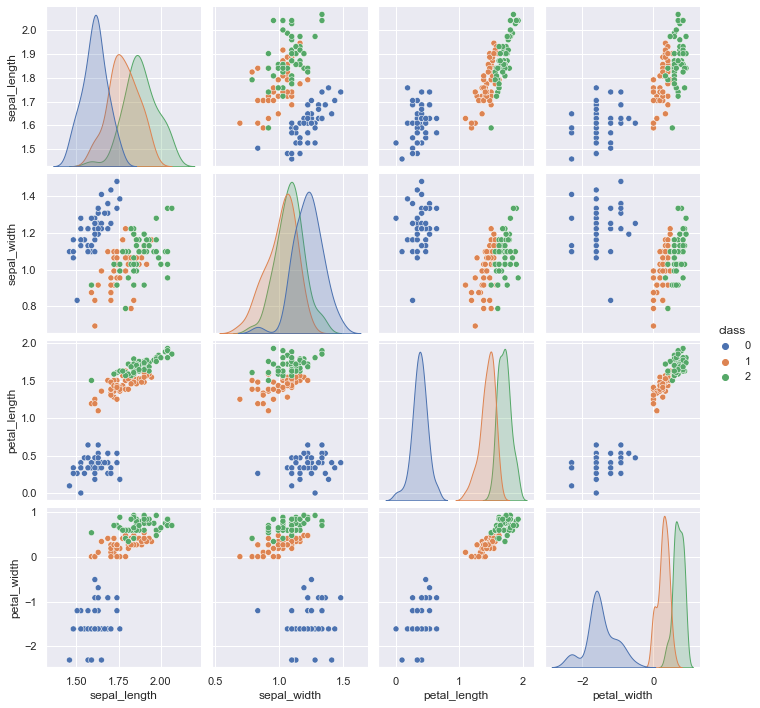

In [15]:
df_log = df[['sepal_length','sepal_width','petal_length','petal_width']].apply(np.log)
df_log['class'] = df['class']
sns.pairplot(df_log, hue='class', palette='deep')

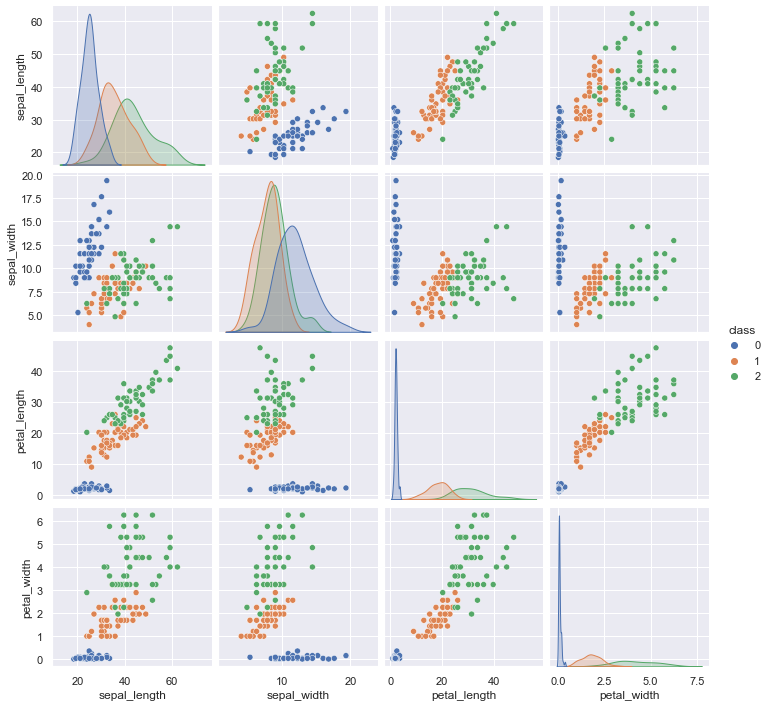

In [16]:
df_sqr = df[['sepal_length','sepal_width','petal_length','petal_width']] ** 2
df_sqr['class'] = df['class']
sns.pairplot(df_sqr, hue='class', palette='deep')

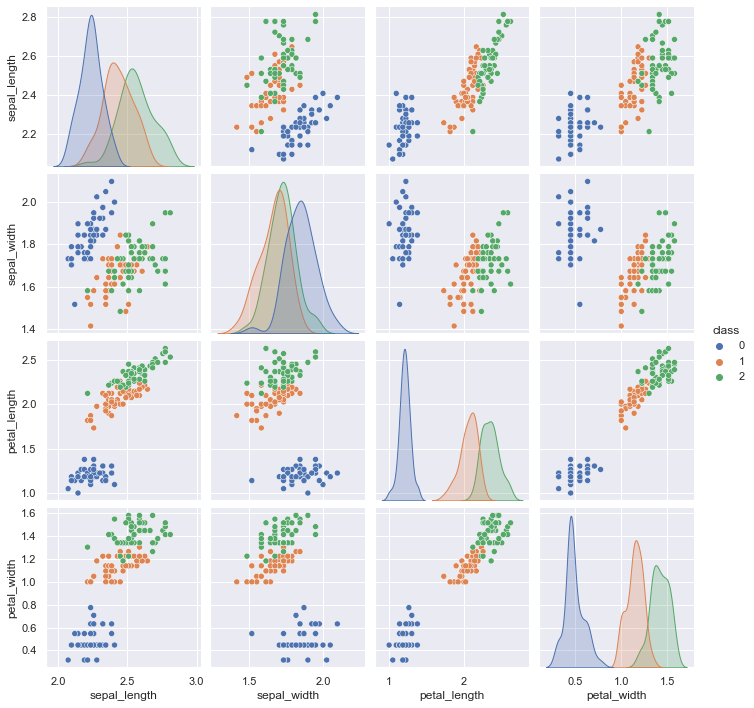

In [17]:
df_sqrt = df[['sepal_length','sepal_width','petal_length','petal_width']] ** 0.5
df_sqrt['class'] = df['class']
sns.pairplot(df_sqrt, hue='class', palette='deep')

# General Observations

1. The most widespread and highest impact feature is clearly petal width followed by petal_length, sepal_length, and sepal_width
2. Class 0 (setosa) appears to have the most distinct features and will be fairly straightforward to classify. Class 1 (versicolor) and Class 2 (virginica) have much more overlap and will likely result in more errors. Experimenting with different ways to distinguish these classes will likely be the key to tuning the model.

# Approach

I'll first create a model based of petal length and width alone, as these are the most impactful features. I'll then combine them with additional features to train other models to see if I can improve accuracy. From there, I'll see if tuning the model parameters results in a higher accuracy. 

## k-Nearest Neighbor Model using petal width and petal length

Next, we are going to use the `KNeighborsClassifier` class from scikit-learn and instantiate a new KNN object, which we call `knn_model`. Then, we "fit" this model the training dataset:

In [ ]:
#Needed to resolve importError for sklearn
#!pip uninstall scikit-learn --yes
#!pip uninstall scipy --yes
#!pip install scikit-learn
#!pip install scipy

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [23]:
#Use petal_width and petal_length as the model parameters
X_1, y_1 = df[['petal_length','petal_width']].values, df['class'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

KNeighborsClassifier(n_neighbors=3)

Test set accuracy 1-Neighbors: 93.33%


<ipython-input-50-8d6dfcb04b68>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


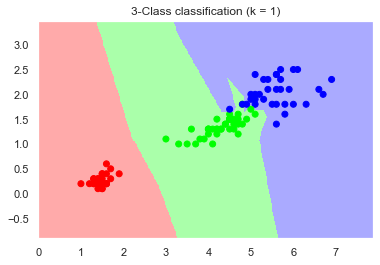

Test set accuracy 2-Neighbors: 91.11%


<ipython-input-50-8d6dfcb04b68>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


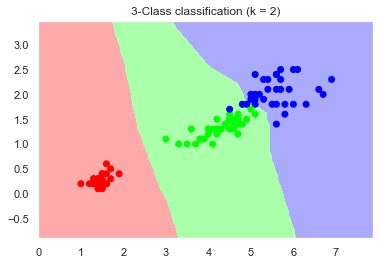

Test set accuracy 3-Neighbors: 95.56%


<ipython-input-50-8d6dfcb04b68>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


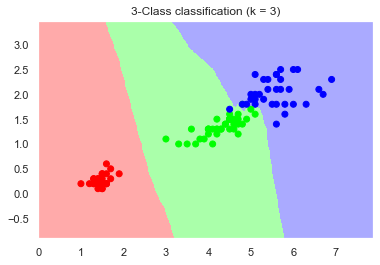

Test set accuracy 4-Neighbors: 93.33%


<ipython-input-50-8d6dfcb04b68>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


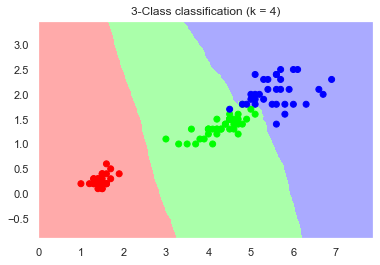

In [50]:
for i in range(1,5):
    knn_model =  KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train1, y_train1)
    print(f'Test set accuracy {i}-Neighbors: {knn_model.score(X_test1, y_test1)*100:.2f}%')

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h=0.02
    x_min, x_max = X_train1[:, 0].min() - 1, X_train1[:, 0].max() + 1
    y_min, y_max = X_train1[:, 1].min() - 1, X_train1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {i})")

    plt.show()

Test set accuracy 1-Neighbors: 93.33%


<ipython-input-56-bfdfa63569fe>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


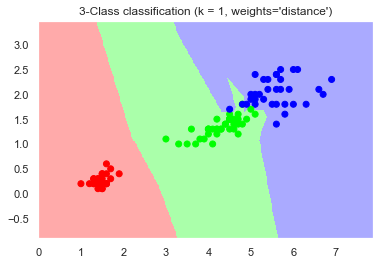

Test set accuracy 2-Neighbors: 93.33%


<ipython-input-56-bfdfa63569fe>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


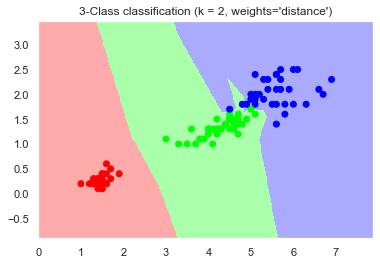

Test set accuracy 3-Neighbors: 93.33%


<ipython-input-56-bfdfa63569fe>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


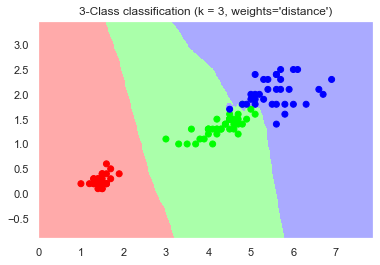

Test set accuracy 4-Neighbors: 93.33%


<ipython-input-56-bfdfa63569fe>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


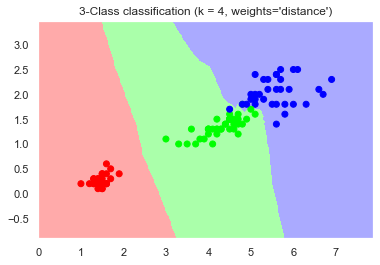

In [56]:
#Running same test with distance instead of uniform weights, performs worse
for i in range(1,5):
    knn_model =  KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn_model.fit(X_train1, y_train1)
    print(f'Test set accuracy {i}-Neighbors: {knn_model.score(X_test1, y_test1)*100:.2f}%')

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h=0.02
    x_min, x_max = X_train1[:, 0].min() - 1, X_train1[:, 0].max() + 1
    y_min, y_max = X_train1[:, 1].min() - 1, X_train1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {i}, weights='distance')")

    #plt.show()

Test set accuracy 1-Neighbors: 93.33%


<ipython-input-61-ecbc60b301d5>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Test set accuracy 2-Neighbors: 91.11%


<ipython-input-61-ecbc60b301d5>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Test set accuracy 3-Neighbors: 95.56%


<ipython-input-61-ecbc60b301d5>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


Test set accuracy 4-Neighbors: 93.33%


<ipython-input-61-ecbc60b301d5>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


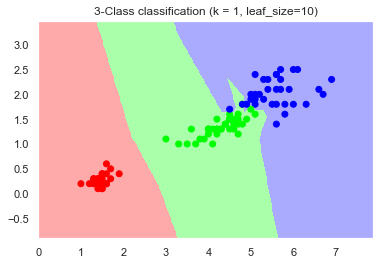

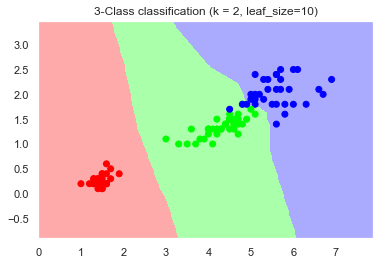

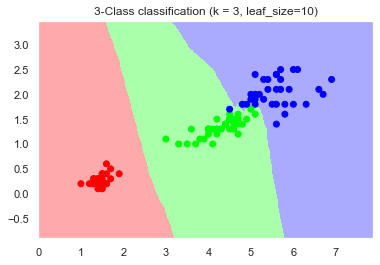

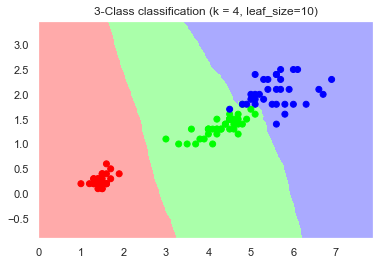

In [61]:
#Running same test with lower leaf_size, equivalent performance
for i in range(1,5):
    knn_model =  KNeighborsClassifier(n_neighbors=i, leaf_size=10)
    knn_model.fit(X_train1, y_train1)
    print(f'Test set accuracy {i}-Neighbors: {knn_model.score(X_test1, y_test1)*100:.2f}%')

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h=0.02
    x_min, x_max = X_train1[:, 0].min() - 1, X_train1[:, 0].max() + 1
    y_min, y_max = X_train1[:, 1].min() - 1, X_train1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_train1, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {i}, leaf_size=10)")

    plt.show()

# knn using log values of petal width and petal length

In [57]:
#Use log of petal_width and petal_length as the model parameters
X_2, y_2 = df_log[['petal_length','petal_width']].values, df_log['class'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

Test set accuracy 1-Neighbors: 93.33%


<ipython-input-63-9d19bface677>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


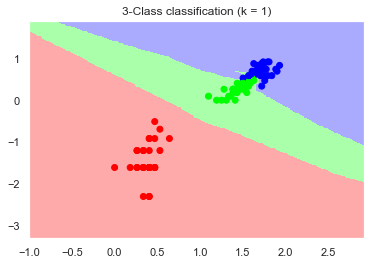

Test set accuracy 2-Neighbors: 91.11%


<ipython-input-63-9d19bface677>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


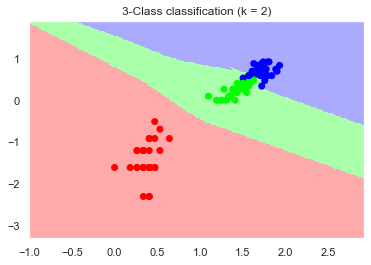

Test set accuracy 3-Neighbors: 95.56%


<ipython-input-63-9d19bface677>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


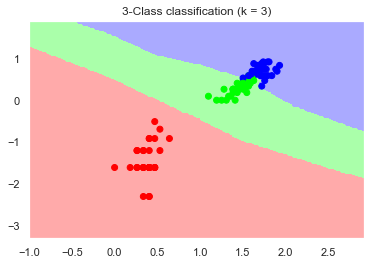

Test set accuracy 4-Neighbors: 95.56%


<ipython-input-63-9d19bface677>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


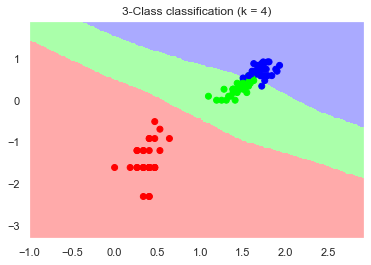

In [63]:
#Same results as base petal length and width, but accuracy remains higher when increasing k.
for i in range(1,5):
    knn_model =  KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train2, y_train2)
    print(f'Test set accuracy {i}-Neighbors: {knn_model.score(X_test2, y_test2)*100:.2f}%')

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h=0.02
    x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
    y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {i})")

    plt.show()

# knn using square of petal length and width

In [66]:
#Use log of petal_width and petal_length as the model parameters
X_3, y_3 = df_sqr[['petal_length','petal_width']].values, df_sqr['class'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

Test set accuracy 1-Neighbors: 93.33%


<ipython-input-67-8207253c039d>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


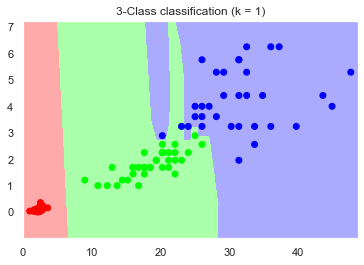

Test set accuracy 2-Neighbors: 91.11%


<ipython-input-67-8207253c039d>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


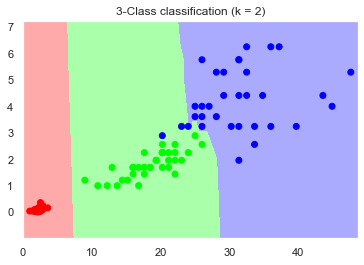

Test set accuracy 3-Neighbors: 95.56%


<ipython-input-67-8207253c039d>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


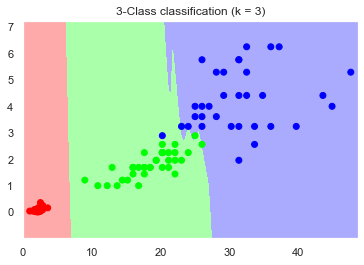

Test set accuracy 4-Neighbors: 91.11%


<ipython-input-67-8207253c039d>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


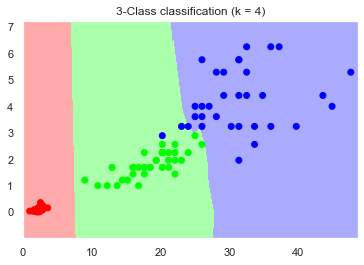

Test set accuracy 5-Neighbors: 93.33%


<ipython-input-67-8207253c039d>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


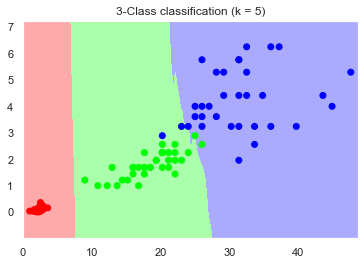

In [67]:
#Same results as base petal length and width, but accuracy remains higher when increasing k.
for i in range(1,6):
    knn_model =  KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train3, y_train3)
    print(f'Test set accuracy {i}-Neighbors: {knn_model.score(X_test3, y_test3)*100:.2f}%')

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h=0.02
    x_min, x_max = X_train3[:, 0].min() - 1, X_train3[:, 0].max() + 1
    y_min, y_max = X_train3[:, 1].min() - 1, X_train3[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_train3, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {i})")

    plt.show()